In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/common_runtimes.csv', index_col=0)
df_relative = df.div(df.loc['CPU'], axis=1) * 100


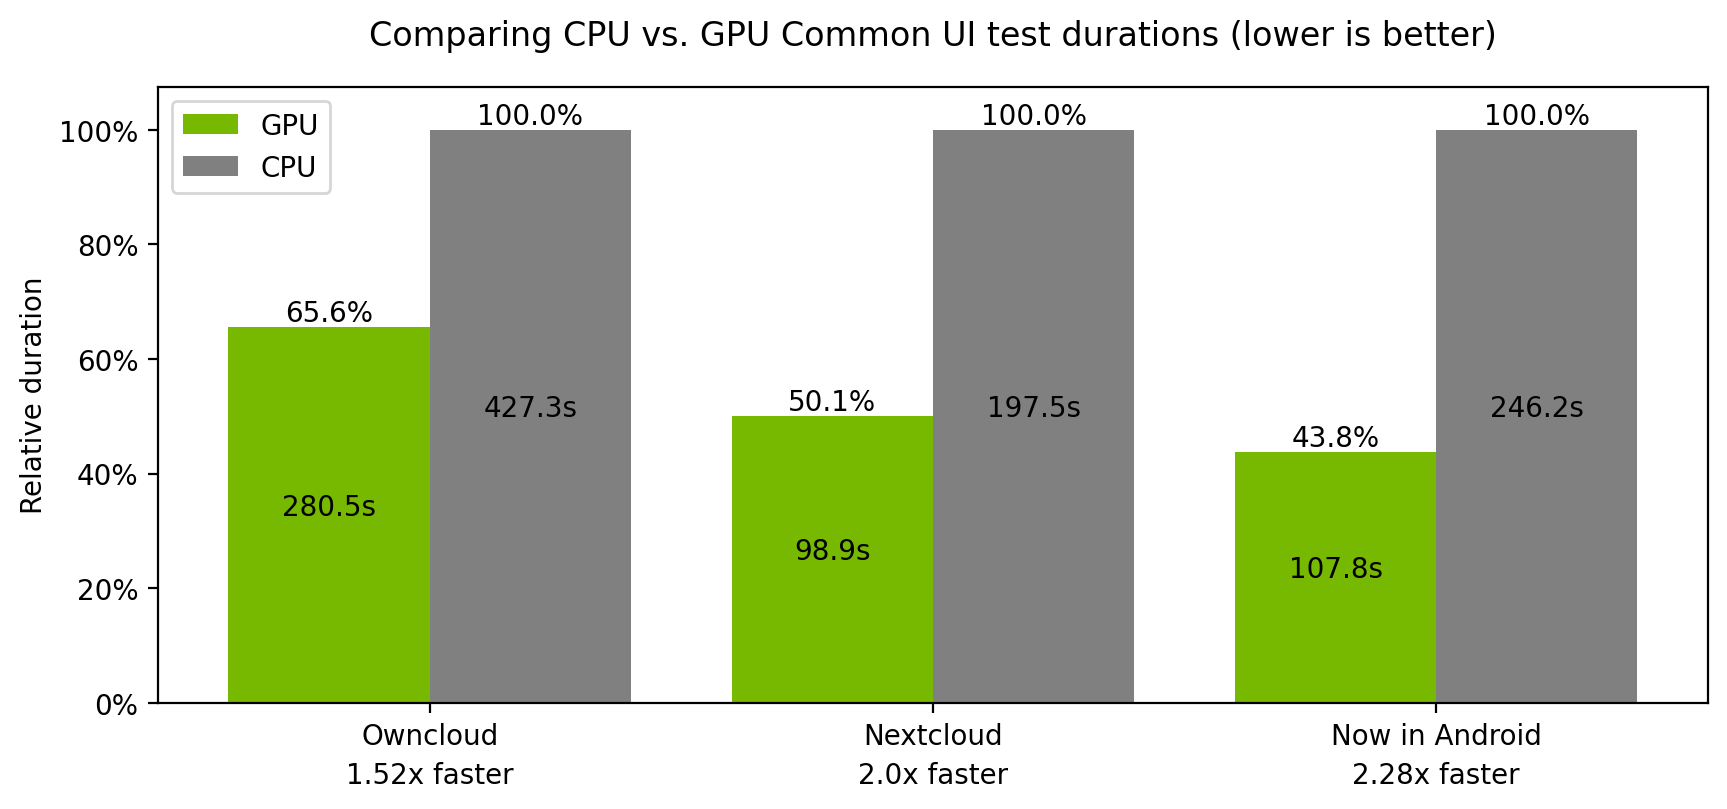

In [4]:
plt.figure(figsize=(10, 4), dpi=200)
plt.title("Comparing CPU vs. GPU Common UI test durations (lower is better)", pad=15)

# x axis
cases = np.arange(len(df.columns))
plt.xticks(cases, df.columns)

# y axis
yticks = range(0, 101, 20)
plt.yticks(yticks, labels=[str(i) + '%' for i in yticks])
plt.ylabel("Relative duration")

# bars
plt.bar(cases - 0.2, df_relative.loc['GPU'], 0.4, label='GPU', color='#76B900')
plt.bar(cases + 0.2, df_relative.loc['CPU'], 0.4, label='CPU', color='grey')
plt.legend()

for i, case in enumerate(df.columns):
    kw = { 'color': 'black', 'horizontalalignment': 'center' }
    df_case = df.loc[:, case]
    df_case_rel = df_relative.loc[:, case]

    # percentages
    plt.text(i - 0.2, df_case_rel['GPU'] + 1, str(round(df_case_rel['GPU'], 1)) + '%', **kw)
    plt.text(i + 0.2, df_case_rel['CPU'] + 1, str(round(df_case_rel['CPU'], 1)) + '%', **kw)

    # absolute values
    plt.text(i - 0.2, df_case_rel['GPU'] / 2, str(round(df_case['GPU'], 1)) + 's', **kw)
    plt.text(i + 0.2, df_case_rel['CPU'] / 2, str(round(df_case['CPU'], 1)) + 's', **kw)

    # speedup
    speedup = df_case_rel['CPU'] / df_case_rel['GPU']
    plt.text(i, -14, f'{round(speedup, 2)}x faster', **kw)

plt.margins(0.05, 0.075)
plt.show()
